In [81]:
#class imbalnce >> when one class at higher percentage
#handle
#upsampling
#downsampling
#SMOTE


In [82]:
import pandas as pd
import numpy as np
np.random.seed(1) #for reproducibity of the result
no_sample=1000
class0_ratio=0.9
no_of_class_0=int(no_sample*class0_ratio)
no_of_class_1=100

In [83]:
no_of_class_0,no_of_class_1

(900, 100)

In [84]:
class_0={'feature1':np.random.normal(0,1,no_of_class_0),
         'feature2':np.random.normal(0,1,no_of_class_0),
         "target":[0]*no_of_class_0
         }

In [85]:
class_0=pd.DataFrame(class_0)

In [86]:
class_0

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [87]:
class_1={'feature1':np.random.normal(3,1,no_of_class_1),
         'feature2':np.random.normal(3,1,no_of_class_1),
         "target":[1]*no_of_class_1
         }

In [88]:
class_1=pd.DataFrame(class_1)

In [89]:
class_1

,feature1,feature2,target
0,1.692029,3.933630,1
1,4.472396,1.236225,1
2,3.074876,2.589783,1
3,1.213065,2.546333,1
4,3.165211,2.410570,1
...,...,...,...
95,3.213026,3.188583,1
96,2.195458,3.560918,1
97,2.353418,2.078341,1
98,4.138173,3.647375,1


In [90]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [91]:
df

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [72]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [92]:
#upsampling
df_minority=df[df.target==1]
df_majority=df[df.target==0]

In [93]:
#replace >>if replace is true ,it means datapoint can be repeated

from sklearn.utils import resample

df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=1)

In [94]:

df_minority_upsampled.shape

(900, 3)

In [95]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])

In [96]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [97]:
#downsampling
df_minority

,feature1,feature2,target
900,1.692029,3.933630,1
901,4.472396,1.236225,1
902,3.074876,2.589783,1
903,1.213065,2.546333,1
904,3.165211,2.410570,1
...,...,...,...
995,3.213026,3.188583,1
996,2.195458,3.560918,1
997,2.353418,2.078341,1
998,4.138173,3.647375,1


In [35]:
df_majority

,feature1,feature2,target
0,1.624345,-0.446699,0
1,-0.611756,0.204377,0
2,-0.528172,0.612233,0
3,-1.072969,0.744885,0
4,0.865408,-0.036281,0
...,...,...,...
895,0.578464,0.833679,0
896,-0.961264,2.160456,0
897,-1.458324,1.998992,0
898,0.494342,0.764041,0


In [98]:
df_majority_downsampled=resample(df_majority,replace=False,n_samples=len(df_minority),random_state=1)

In [103]:
df_majority_downsampled

,feature1,feature2,target
860,-0.977773,0.872579,0
880,0.309817,1.835870,0
874,0.050317,0.146532,0
780,0.677808,-0.859827,0
525,0.713049,0.320971,0
...,...,...,...
494,-1.579156,2.711950,0
255,-1.044589,0.522655,0
672,0.410266,0.683356,0
481,-1.114871,-0.800787,0


In [107]:
df_downsample=pd.concat([df_minority,df_majority_downsampled])

In [109]:
df_downsample.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [136]:
#SMOTE=Synthetic minority over sampling technique
from sklearn.datasets import make_classification

# Generate imbalanced dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0,  # Fixed typo here
    n_clusters_per_class=1, 
    weights=[0.90],  # Imbalance: 90% of one class
   
)



In [137]:
X

array([[ 0.98559517, -1.17223474],
       [ 1.45637904,  0.12698457],
       [ 1.45604424,  0.28698119],
       ...,
       [ 0.78026638, -1.26200115],
       [ 0.74864045, -1.57434891],
       [ 0.8268166 , -1.21536623]], shape=(1000, 2))

In [138]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [139]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [140]:
final_df

,f1,f2,target
0,0.985595,-1.172235,0
1,1.456379,0.126985,0
2,1.456044,0.286981,0
3,1.138176,-0.660388,0
4,1.117417,-0.757762,0
...,...,...,...
995,1.175045,-0.533648,0
996,0.975479,-0.944991,0
997,0.780266,-1.262001,0
998,0.748640,-1.574349,0


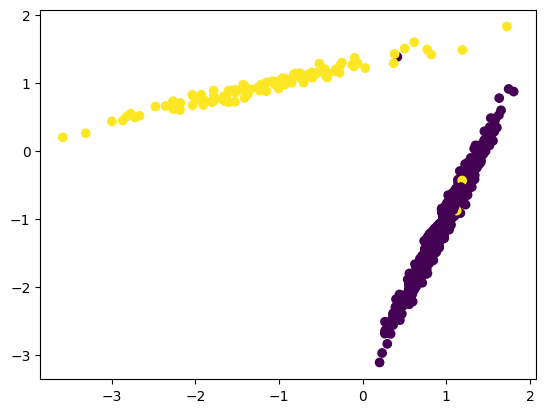

In [141]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [125]:
!pip install imblearn

^C



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\91983\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [142]:
from imblearn.over_sampling import SMOTE
OVERSAMLE=SMOTE()

In [143]:
x,y=OVERSAMLE.fit_resample(final_df[['f1','f2']],final_df['target'])

In [144]:
x.shape

(1796, 2)

In [145]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
smote_df=pd.concat([df1,df2],axis=1)

In [146]:
smote_df

,f1,f2,target
0,0.985595,-1.172235,0
1,1.456379,0.126985,0
2,1.456044,0.286981,0
3,1.138176,-0.660388,0
4,1.117417,-0.757762,0
...,...,...,...
1791,NaN,NaN,1
1792,NaN,NaN,1
1793,NaN,NaN,1
1794,NaN,NaN,1


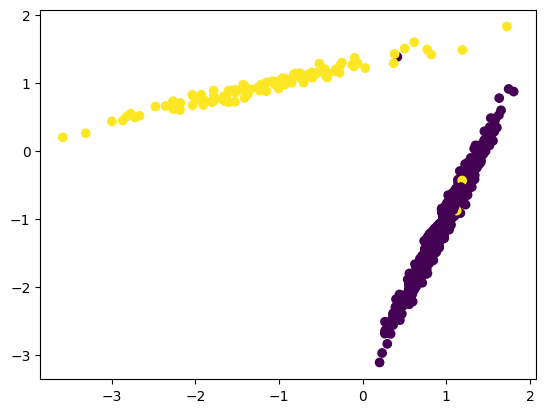

In [147]:
plt.scatter(smote_df['f1'],smote_df['f2'],c=smote_df['target'])